# Employee Earnings Report- 2017
- This data set contains payroll information of employees in different postal regions in BOSTON for 2017.
- This dataset contains details such as:  
  -  Employee names
  - "Job Titles"  in different  "Departments"
  - Types of pays the employees receives along with Base Pay such as
         - Overtime pay
         - Quinn Incentive pay
         - Retro pay
         - Other and Detail pay
  - Total earnings by summing all types of pays

# Describing the columns of the data set

- NAME
  -  Last name and first name of the Employee
  

- DEPARTMENT NAME
   - Name of the Department where the employee is working
   

- TITLE
  - Job Role of the Employee


- REGULAR
   - The base salary of the employee without including over time, educational incentive or servce incentive


- RETRO
  - Compensation paid for employee for work in previous period


- OTHER
  - Bonus Incentive Earnings due to any promotions or skills


- OVER TIME
  - Earnings due to the extra hours worked


- INJURED
  - Regular injured and Retro injured earnings


- DETAIL
  -  Detail pay of the employee


- QUINN/EDUCATIONAL IINCENTIVE
   - Earnings for any higher degree obtained by the Employee in same department


- TOTAL EARNINGS
  -  All earnings received during 2017. This includes Regular salary, Over Time pay, Retro pay, Injured pay, Educational Incentive, detail and other pay. 


- POSTAL
  - The area code in Boston


# Importing Required Libraries

In [214]:
#  Extraction and Exploration
import pandas as pd  # for dataframes
%matplotlib inline
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import numpy as np
import seaborn as sns

# Predictive Analytics
from sklearn import preprocessing
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sys

# Extracting data set using pandas
- Reading the data set using read_csv () function of pandas by specifying the pathof the data set
- Dsiplaying only first few rows of the data set using head () function by specifying the number of rows to be displayed
- We can also use loc[ ] (location) function for specifying the rows or columns to display based on requirement

In [215]:
# Reading the Data set 
df_report_2017=pd.read_csv('https://data.boston.gov/dataset/418983dc-7cae-42bb-88e4-d56f5adcf869/resource/70129b87-bd4e-49bb-aa09-77644da73503/download/employee-earnings-report-2017.csv',encoding='latin-1')
#df_report_2017.loc[0:3,:]
df_report_2017.head(3)

,NAME,DEPARTMENT NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN/EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL
0,"Miller,Francis T",Boston Police Department,Police Lieutenant (Det),"$129,530.83",NaN,"$13,694.50","$8,150.41",NaN,NaN,"$24,286.86","$175,662.60",2043
1,"Sullivan,Patrice Murphy",Boston Police Department,Office Manager,"$56,921.80",NaN,"$3,594.65","$1,548.16",NaN,NaN,NaN,"$62,064.61",2132
2,"O'Hara,Michael C",Boston Police Department,Police Lieutenant,"$124,056.64",NaN,"$6,432.23","$29,043.67",NaN,"$22,385.00","$23,260.69","$205,178.23",2021


# Questions to be answered using data set

Exploratory
- To identify which employee in the department gets highest base salary and from which area(postal code). 
- To identify which employee is highly educated based on the QUINN/EDUCATION INCENTIVE
- To identify the employee who is working for long hours based on highest OVERTIME payment.
- Which position is the top position among all departments based on the REGULAR payment.
- Overall which employee has highest total earnings( adding all payment details)

Visualization
- Identifying how much amount of each pay contributed for total earnings for different postal codes
- Box plot for Total Earnings in all departments to find the OUTLIERS present in the Total Earnings
- Explaining the Distribution of Each pay column data with the help of Histograms.
- Implot for Quinn and Base pay

Predictive
- With increase in percentage of QUINN pay does the employees get high base pay of not. Predicting the base pay based on quinn pay
- PLot of Base pay and Retro pay and checking their distribution
- OLS regression results
- Highly Educated employees work for long hours or not

# Cleaning the data set
- Renaming Inconsistent Column names for better understanding i.e, Renaming the column names
- Checking the duplicates in all columns
- Cleaning Unwanted data in first 3 columns
- Cleaning unwanted data in Posatl code column
- Missing data - Checking
- Checking the data types of all Columns
- Dropping few rows with NaN values for better analysis

In [216]:
# It gives total count of values present but not null counts
df_report_2017.info()

# Describing the data set
df_report_2017.describe()

# Describing the dataset columns
df_report_2017.columns.tolist()

# The shape of the dataset-rows*columns
df_report_2017.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22245 entries, 0 to 22244
Data columns (total 12 columns):
NAME                         22245 non-null object
DEPARTMENT NAME              22245 non-null object
TITLE                        22245 non-null object
REGULAR                      21640 non-null object
RETRO                        3258 non-null object
OTHER                        13083 non-null object
OVERTIME                     6783 non-null object
INJURED                      1283 non-null object
DETAIL                       2423 non-null object
QUINN/EDUCATION INCENTIVE    1259 non-null object
TOTAL EARNINGS               22245 non-null object
POSTAL                       22242 non-null object
dtypes: object(12)
memory usage: 2.0+ MB


(22245, 12)

# Renaming Inconsistent Column names for better understanding 
- Most of the columns are consistent. I have renamed all the columns to identify easily
- Using .rename () to modify the names of columns by specifying the columns to be renamed in "columns" function
- Displaying first few columns using head () function

In [217]:
# Renaming the columns which makes easy to identify
#df_report_2017.columns=['NAME','DEPARTMENT NAME','TITLE','REGULAR PAY ($)','RETRO PAY ($)','OTHER ($)','OVER TIME ($)','INJURED ($)','DETAIL ($)','QUINN/EDUCATION INCENTIVE ($)','TOTAL EARNINGS ($)','POSTAL CODE']
df_report_2017 = df_report_2017.rename(columns={'NAME':'FULL NAME','TITLE':'EMPLOYEE POSITION TITLE','REGULAR':'BASE PAY ($)','RETRO':'RETRO PAY ($)','OTHER':'OTHER PAY ($)','OVERTIME':'OVERTIME PAY ($)','INJURED':'INJURED PAY ($)','DETAIL':'DETAIL PAY ($)','QUINN/EDUCATION INCENTIVE':'QUINN/EDUCATION INCENTIVE ($)','TOTAL EARNINGS':'TOTAL EARNINGS ($)','POSTAL':'POSTAL CODE'})
df_report_2017.head()

,FULL NAME,DEPARTMENT NAME,EMPLOYEE POSITION TITLE,BASE PAY ($),RETRO PAY ($),OTHER PAY ($),OVERTIME PAY ($),INJURED PAY ($),DETAIL PAY ($),QUINN/EDUCATION INCENTIVE ($),TOTAL EARNINGS ($),POSTAL CODE
0,"Miller,Francis T",Boston Police Department,Police Lieutenant (Det),"$129,530.83",NaN,"$13,694.50","$8,150.41",NaN,NaN,"$24,286.86","$175,662.60",2043
1,"Sullivan,Patrice Murphy",Boston Police Department,Office Manager,"$56,921.80",NaN,"$3,594.65","$1,548.16",NaN,NaN,NaN,"$62,064.61",2132
2,"O'Hara,Michael C",Boston Police Department,Police Lieutenant,"$124,056.64",NaN,"$6,432.23","$29,043.67",NaN,"$22,385.00","$23,260.69","$205,178.23",2021
3,"Whalen,Richard L",Boston Police Department,Police Detective,"$94,956.25","$4,985.32","$13,591.93","$85,419.22",$58.03,"$16,330.00","$19,971.01","$235,311.76",2062
4,"Kelly,Ann Marie",Boston Police Department,Tape Librarian I (BPD),"$69,995.34",NaN,$300.00,"$7,961.08",NaN,NaN,NaN,"$78,256.42",2190


# Checking the duplicates 
- The 'NAMES' column has some duplictes, Checking whether those duplicates have same or different "DEPARTMENT NAMES" and also checking the "POSTAL CODE" of the duplicates in "FULL NAME" column.
   - Using unique() method, are the columns "FULL NAME, DEPARTMENT NAME AND POSTAL CODE" are unique or not
   - Checking is there any duplicates using duplicated() function
   - finding the counts of each name in first column "FULL NAME"
   - A most repeated name obtained in the second step (duplicates) is used for checking whether "POSTAL CODE" column values are same or different
   - find the shape of the data set after droping duplicates which gives is there any duplicates
    
- Findings
   -     There are many duplicates of the names of the employees in "FULL NAME" column with different "POSTAL CODES". There is no need to drop the duplicates because they are of different data.
   - There may be chance of failing to identify the duplicates, so I dropped the duplicates to make sure that whether there are any duplicates or not.
   -  After dropping duplicates the shape of data set equal to the shape of original dataset. This gives a proof that there rae no duplicates
   -  Finally there are not duplicates in data set

In [218]:
# checking whether the columns are unique or not
df_report_2017['FULL NAME'].is_unique
df_report_2017['DEPARTMENT NAME'].is_unique
df_report_2017['POSTAL CODE'].is_unique

# duplicates in 'NAME' column with different postal codes
names = df_report_2017['FULL NAME'].value_counts()
print(names[names > 1])

# This tells there are no duplicate rows because it takes the entire row. We used 'apply' fuunction to use shape module
df_report_2017.groupby(df_report_2017['FULL NAME']).apply(np.shape)
print(df_report_2017.duplicated('FULL NAME'))

# I set the 'FULL NAME' column as an index and checking whether a particular name is repeated in a same postal area or not
#df_report_2017.set_index(df_report_2017["FULL NAME"], inplace = True)
#df_report_2017.loc['Sullivan,Michael',]

# Checking the most repeated name to the 'POSTAL CODE' column values  
df=df_report_2017['FULL NAME']== 'Sullivan,Michael'
df_report_2017.loc[df]

# checking the duplicates by droping the duplicates and finding the shape of the data set after dropping duplicates
df_report_2017.shape # Before dropping - 22245*12
df_report_2017=df_report_2017.drop_duplicates()
df_report_2017.reset_index(drop=True, inplace=True)
df_report_2017.shape # After dropping - 22245*12

Sullivan,Michael        4
Kelly,Michael           3
Foley,Kevin J           2
Bennett,Shauna          2
Johnson,Cynthia         2
Crowley,Kathleen        2
Medina,Ana              2
Rosario,Jacqueline      2
Gallagher,Kelly A       2
McClain,Diane           2
McCarthy,Kevin M        2
O'Keefe,Michael         2
Brown,Charlene          2
Kelly,Cheryl            2
Lee,Winnie              2
Finnigan,Patricia       2
Doherty,Brian J         2
Lynch,Michael           2
Flaherty,Sean           2
Brown,Johanna           2
Carroll,William F       2
Foley,William P         2
Mills,Lemuel V          2
Powers,Kathleen         2
Murphy,Shannon          2
Kelly,John F            2
Lang,Deborah A          2
Marsh,Kathleen A        2
Curtis,David            2
Wilson,Laura            2
                       ..
Simon,Victor            2
Burke,Kathleen          2
Colon,Francisco         2
Savicke,Richard J       2
Murphy,Daniel           2
Rodriguez,Jacqueline    2
Harrington,Richard F    2
Sullivan,Joh

(22245, 12)

# Cleaning unwanted Data in First 3 columns
-  First 3 columns related to FULL NAME, DEPARTMENT NAME and EMPLOYEE POSITION TITLE.
- Unwanted data
  -   The ' # ' tags in DEPARTMENT NAME and EMPLOYEE POSITION TITLE.
  -   Some data after ' / ' , ' - ' and with in paranthesis () in both DEPARTMENT NAME and EMPLOYEE POSITION TITLE.
  -   In FULL NAME, first name is seperated by ' , ' from last name.
  -   In FULL NAME, after the name '.' is present for few rows.
  -   There are some special characters like ""(double quotes) and ' , ' in DEPARTMENT NAME and EMPLOYEE POSITION TITLE.
  
  
- The data after the ' / ' and ' - ' symbols in DEPARTMENT NAME and EMPLOYEE POSITION TITLE columns were removed using .str.split().str function.
- Using str.replace(), the data within paranthesis is removed from DEPARTMENT NAME and EMPLOYEE POSITION TITLE columns.
- In FULL NAME, the ' , ' present between first name and last name are removed using str.replace() by converting object data type to string data type. 
- The ' . ' present after the names in FULL NAME column is removed using str.replace()

- Finally all the special symbols (unwanted data) present in the first three columns were removed

In [219]:
# Removing any special symbols present in first 3 column sof data set
df_report_2017['EMPLOYEE POSITION TITLE']= df_report_2017['EMPLOYEE POSITION TITLE'].str.replace(r"\(.*\)","")
df_report_2017['DEPARTMENT NAME']= df_report_2017['DEPARTMENT NAME'].str.replace(r"\(.*\)","")
df_report_2017['EMPLOYEE POSITION TITLE'] = df_report_2017['EMPLOYEE POSITION TITLE'].str.split('/').str[0]
df_report_2017['EMPLOYEE POSITION TITLE'] = df_report_2017['EMPLOYEE POSITION TITLE'].str.split('-').str[0]
df_report_2017['EMPLOYEE POSITION TITLE'] = df_report_2017['EMPLOYEE POSITION TITLE'].str.split(',').str[0]
df_report_2017['DEPARTMENT NAME'] = df_report_2017['DEPARTMENT NAME'].str.split('/').str[0]
df_report_2017['DEPARTMENT NAME'] = df_report_2017['DEPARTMENT NAME'].str.split('-').str[0]

# Removing any special characters present in Full name, department name and Employee position title
df_report_2017[df_report_2017['FULL NAME']=='Simon,Martin'] # HERE EMPLOYEE POSITION TITLE CONTAINS UNWANTED CHARACTERS
df_report_2017[['DEPARTMENT NAME','EMPLOYEE POSITION TITLE']] =df_report_2017[['DEPARTMENT NAME','EMPLOYEE POSITION TITLE']].replace({'\$': '', ',': '','\##':'','\###':'','""':'','#':''}, regex=True)

# Removing the ',.' present in the FULL NAME of a data set
df_report_2017['FULL NAME'] = df_report_2017['FULL NAME'].str.replace(","," ")
df_report_2017['FULL NAME'] = df_report_2017['FULL NAME'].str.replace("."," ")


#checking whether the symbols are removed or not
df_report_2017[df_report_2017['FULL NAME']=='Nicholson Anthony']
#df_report_2017

,FULL NAME,DEPARTMENT NAME,EMPLOYEE POSITION TITLE,BASE PAY ($),RETRO PAY ($),OTHER PAY ($),OVERTIME PAY ($),INJURED PAY ($),DETAIL PAY ($),QUINN/EDUCATION INCENTIVE ($),TOTAL EARNINGS ($),POSTAL CODE
18371,Nicholson Anthony,BPS Cl10 Lee Academy,Surround Care Paraprofessional,"$42,189.22",NaN,"$2,200.00",NaN,NaN,NaN,NaN,"$44,389.22",2119


# Cleaning unwanted data in Postal code column
- For many rows in POSTAL CODE column contains "UNKNOW" and "BIS 3" data instead of postal codes
- I am replacing "UNKNOW" with NaN and also "B1S 3" with NaN 
- Since the postal codes of Boston all are integers only, But mostly data type of string is preferred for postal codes
- Using .replace() to replace the values with NaN and checking whether they replaced with NaN or not by displaying few rows which have 'UNKNO' before using .loc()
- Finally POSTAL CODE column doesnt have any unwanted data

In [220]:
# The postal value for a full name of employee 'Morrison,June', contains "BIS 3"
df=df_report_2017['FULL NAME']== 'Morrison June'
df_report_2017.loc[df]

# Many values in Postal codes are unknown. we have to replace those with NAN.
df_report_2017['POSTAL CODE'].loc[22139:22182] # Before cleaning

# replacing' UNKNO' in "POSTAL CODE" with NaN
df_report_2017.replace(to_replace="UNKNO", value=np.nan, inplace=True)
#df_report_2017['POSTAL CODE'].replace(regex={'UNKNO':'NAN', 'BIS 3':'NaN'})
#df_report_2017.replace({'POSTAL CODE': {'UNKNO':'NAN', 'BIS 3':'NaN'}})
df_report_2017['POSTAL CODE'].loc[22139:22182] # After cleaning

#replacing "B1S 3" value in "POSTAL CODE" with NAN
df_report_2017['POSTAL CODE'].replace(to_replace="B1S 3", value=np.nan, inplace=True)
df=df_report_2017['FULL NAME']== 'Morrison June'
df_report_2017.loc[df]
 

,FULL NAME,DEPARTMENT NAME,EMPLOYEE POSITION TITLE,BASE PAY ($),RETRO PAY ($),OTHER PAY ($),OVERTIME PAY ($),INJURED PAY ($),DETAIL PAY ($),QUINN/EDUCATION INCENTIVE ($),TOTAL EARNINGS ($),POSTAL CODE
6818,Morrison June,BPS Business Service,BPS Worker's Comp Job Class,NaN,NaN,NaN,NaN,"$67,171.05",NaN,NaN,"$67,171.05",NaN


# Missing data
- Checking are there any blanks or zero (0) or negative values which effects the data
- If any null values are present, replace those with NAN values
- To know any null values present in the dataset, we use isnull () function
- Subtracting the non-null values from total entries gives the null value count
- Using sum () to isnull () method, we can get the total null values in all columns

Findings: There are no blanks or negative values in all columns. Already all the blank values are filled with NAN.
- No Missing values in the data set

In [221]:
# Null values in all columns(False or True)
df_report_2017.isnull().any()

# Null values for the complete data set
df_report_2017.isnull().any().any()
df_report_2017.info()

# to describe the rows and columns without null values
df_report_2017.dropna().describe()

# to describe the data set considering all values
df_report_2017.describe()

# Total NAN values in our data
df_report_2017.isnull()
df_report_2017.isnull().sum()
#df_report_2017['BASE PAY ($)'].replace(0, np.nan, inplace= True)

# Suppose if there are any "none" values by chance replacing those with NaN
#df_report_2017.replace(to_replace=[None], value=np.nan, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22245 entries, 0 to 22244
Data columns (total 12 columns):
FULL NAME                        22245 non-null object
DEPARTMENT NAME                  22245 non-null object
EMPLOYEE POSITION TITLE          22245 non-null object
BASE PAY ($)                     21640 non-null object
RETRO PAY ($)                    3258 non-null object
OTHER PAY ($)                    13083 non-null object
OVERTIME PAY ($)                 6783 non-null object
INJURED PAY ($)                  1283 non-null object
DETAIL PAY ($)                   2423 non-null object
QUINN/EDUCATION INCENTIVE ($)    1259 non-null object
TOTAL EARNINGS ($)               22245 non-null object
POSTAL CODE                      22195 non-null object
dtypes: object(12)
memory usage: 2.0+ MB


FULL NAME                            0
DEPARTMENT NAME                      0
EMPLOYEE POSITION TITLE              0
BASE PAY ($)                       605
RETRO PAY ($)                    18987
OTHER PAY ($)                     9162
OVERTIME PAY ($)                 15462
INJURED PAY ($)                  20962
DETAIL PAY ($)                   19822
QUINN/EDUCATION INCENTIVE ($)    20986
TOTAL EARNINGS ($)                   0
POSTAL CODE                         50
dtype: int64

# checking the Data Types of the columns
- All the columns are of Object data type
- To analyse and visualize the data we have to convert the pay details into float data type
- Before that we are removing the Dollar symbol and some special characters present in all pay detail columns using replace() function.
- Due to the dollar symboL and other symbol like'()', we cannot convert the data type of the column to any other type like Float or int.
- I have converted all the Object data type of columns in cols list to String data type
- Uisng .replace() function, all the symbols were removed and Now we can convert the columns into float data type
- Using astype() function, I have converted the numpy object daya type to float data type.

Finally I can perform operations on those columns after data type conversion

In [222]:
# Data types of columns
df_report_2017.dtypes
# creating a list of required columns where we need to remove the $ symbol
cols=["BASE PAY ($)","RETRO PAY ($)","OTHER PAY ($)","OVERTIME PAY ($)","INJURED PAY ($)","DETAIL PAY ($)","QUINN/EDUCATION INCENTIVE ($)","TOTAL EARNINGS ($)"]
# Converting all object data type columns to String data type
df_report_2017['BASE PAY ($)'] = df_report_2017['BASE PAY ($)'].astype(str)
df_report_2017['RETRO PAY ($)'] = df_report_2017['RETRO PAY ($)'].astype(str)
df_report_2017['OTHER PAY ($)'] = df_report_2017['OTHER PAY ($)'].astype(str)
df_report_2017['OVERTIME PAY ($)'] = df_report_2017['OVERTIME PAY ($)'].astype(str)
df_report_2017['INJURED PAY ($)'] = df_report_2017['INJURED PAY ($)'].astype(str)
df_report_2017['DETAIL PAY ($)'] = df_report_2017['DETAIL PAY ($)'].astype(str)
df_report_2017['QUINN/EDUCATION INCENTIVE ($)'] = df_report_2017['QUINN/EDUCATION INCENTIVE ($)'].astype(str)
#print (df_report_2017[pd.to_numeric(df_report_2017.cols, errors='coerce').isnull()])

# Removing the DOLLAR SYMBOL '$' from the pay details columns
df_report_2017[cols] = df_report_2017[cols].replace({'\$': '','\(': '', '\)':'', ',': ''}, regex=True)

# converting the data type of pay details of employee columns to float Data type
df_report_2017[cols] = df_report_2017[cols].astype(float)
#df_report_2017['BASE PAY ($)']=pd.to_numeric(df_report_2017['BASE PAY ($)'])

# Data type of all columns of data set
#df_report_2017[cols].head()
df_report_2017.dtypes

# checking whether we can perform any operations or not
df_report_2017['BASE PAY ($)']*2


0        259061.66
1        113843.60
2        248113.28
3        189912.50
4        139990.68
5         25513.58
6        186360.84
7              NaN
8         27654.78
9        215198.62
10       186360.84
11        96035.38
12       207975.82
13             NaN
14             NaN
15          761.42
16       116011.60
17       194827.34
18       186360.84
19       293788.56
20       259061.66
21       234817.96
22       189912.50
23       250140.84
24        28238.74
25       298484.68
26        88005.20
27       116995.48
28        32743.04
29       207781.20
           ...    
22215     92353.92
22216     11122.38
22217    127345.44
22218      5550.00
22219    112151.72
22220    128412.96
22221    106982.36
22222    100567.92
22223    130861.92
22224      9960.14
22225    124437.60
22226    103722.10
22227     72876.64
22228     95345.66
22229      9669.96
22230    109226.36
22231     99084.20
22232     77824.36
22233     32491.56
22234     95211.90
22235     69335.94
22236     73

# Dropping few rows with NaN values for better analysis
- There are lot of NaN values in all columns except the first 3 columns. All rows which have NAN values are dropped for better analysis.
- This is done using .dropna(subset [ ] ) 
- This is because I am Analyzing the data set with employees who receives all types of payments

Findings:
- Finally I got 123 rows, that means there are only 123 employees who receives all payments types including Base pay
- All the employees belong to same Department named "Boston Police Department" in different postal areas

In [223]:
# dropping NaN values in BASE PAY and TOTAL EARNINGS columns
df_report_2017 = df_report_2017.dropna(subset=['BASE PAY ($)', 'TOTAL EARNINGS ($)','POSTAL CODE'])
df_report_2017

# I removed all the NAN values in all columns to see who receive all payment options
df_report_2017_list = df_report_2017.dropna(subset=['BASE PAY ($)', 'TOTAL EARNINGS ($)','RETRO PAY ($)','OTHER PAY ($)','OVERTIME PAY ($)','INJURED PAY ($)','DETAIL PAY ($)','QUINN/EDUCATION INCENTIVE ($)','POSTAL CODE'])
df_report_2017_list


,FULL NAME,DEPARTMENT NAME,EMPLOYEE POSITION TITLE,BASE PAY ($),RETRO PAY ($),OTHER PAY ($),OVERTIME PAY ($),INJURED PAY ($),DETAIL PAY ($),QUINN/EDUCATION INCENTIVE ($),TOTAL EARNINGS ($),POSTAL CODE
3,Whalen Richard L,Boston Police Department,Police Detective,94956.25,4985.32,13591.93,85419.22,58.03,16330.0,19971.01,235311.76,2062
159,Shoulla Christopher K,Boston Police Department,Police Offc Comm Serv Offc 38,72854.70,2410.37,8364.66,62211.53,21193.90,30406.0,18490.71,215931.87,2339
178,Colburn Robert P,Boston Police Department,Police Offc Canine 26,14733.76,2170.50,14232.27,2842.65,78984.76,7176.0,18470.46,138610.40,2081
207,Manning John J,Boston Police Department,Police Officer,29847.00,2457.15,800.00,9265.20,63339.98,11914.0,14733.53,132356.86,2370
260,Worthy Jeffrey Maurice,Boston Police Department,Police Officer,44597.40,1888.97,5982.59,5838.17,48467.81,10580.0,18318.81,135673.75,2119
261,Ajemian Gerald F,Boston Police Department,Police Offc Comm Serv Offc 38,91648.97,1606.38,10870.32,47880.40,558.22,6946.0,14509.98,174020.27,2081
363,Difazio Vincent J,Boston Police Department,Police Detective,37969.12,1977.40,9548.65,31197.22,60872.12,8740.0,20670.45,170974.96,2351
481,Arthur Darnell,Boston Police Department,Police Officer,81997.10,2123.46,2891.29,22948.63,11183.32,38640.0,14733.53,174517.33,2126
518,Aviles Elvin,Boston Police Department,Police Officer,93180.42,2305.80,4091.29,37800.10,47.57,61456.0,14733.53,213614.71,2131
534,Lee Donald M,Boston Police Department,Police Detective,62727.80,2300.71,12348.38,36640.03,35804.90,10672.0,20656.60,181150.42,2339


# Data Exploration
- After filtering the data set, the data set has details of employees who gets all types of payments. I am exploring the data set using the questions belows.
     - Employee with highest base pay
     - Highly educated employee
     - Employee who works for long hours
     - Employee with least base pay
     - Employee with highest earnings

# Employee with highest base pay
- To find the highest base pay received by the employee using the idxmax() function as it returns the index value of the highest base pay
- Using .loc() function the name of the employee who receives high base pay based on the index returned by idxmax () function 

Findings:
- The position of the employee who gets highest base pay is "Police Sergeant"
- The employee belongs to the area of 2050 postal code
- This employee receives more base pay and overtime pay compared to other payments types 

In [224]:
#To identify which employee in the all departments gets highest base salary and from which area(postal code).

high_sal_index=df_report_2017_list['BASE PAY ($)'].idxmax()

print("Name of the employee who gets highest base pay of all departments : ",df_report_2017_list.loc[high_sal_index]['FULL NAME'])

# To know the highest paid (base pay) department 
print("highest base salary department is :",df_report_2017_list.loc[high_sal_index]['DEPARTMENT NAME'])

# To know the entire details of employee with highest base pay
df_report_2017_list.loc[high_sal_index]

Name of the employee who gets highest base pay of all departments :  Brown Michael A
highest base salary department is : Boston Police Department


FULL NAME                                 Brown Michael A
DEPARTMENT NAME                  Boston Police Department
EMPLOYEE POSITION TITLE                   Police Sergeant
BASE PAY ($)                                       102163
RETRO PAY ($)                                     2477.61
OTHER PAY ($)                                     8737.68
OVERTIME PAY ($)                                  29762.4
INJURED PAY ($)                                    2988.3
DETAIL PAY ($)                                      61904
QUINN/EDUCATION INCENTIVE ($)                       19348
TOTAL EARNINGS ($)                                 227381
POSTAL CODE                                          2050
Name: 9964, dtype: object

# Highly educated employee
- To find the employee with highest qualification, I use idxmax() to find the index for the highest paid employee in the QUINN/EDUCATION INCENTVE column.
- Using .loc () function the name of the employee who get highest QUINN INCENTIVE PAY obtained from the index provided by idxmax ().

Findings:
- The Department of the employee is "Boston Police Department" and the title is "Police Detective"
- This employee belongs to the area of 2032 postal code.
- This employee receives INJURED PAY double the INJURED PAY
- This employee's OVERTIME pay is close to BASE PAY. I think the employee works very hard.
- QUINN pay is very high compared to other employees. I think the employee is highly educated

In [225]:
#To identify which employee is highly educated based on the QUINN/EDUCATION INCENTIVE
 
high_pay_quinn_index = df_report_2017_list['QUINN/EDUCATION INCENTIVE ($)'].idxmax()
print(" The employee who is highly educated and gets high QUINN incentive is :",df_report_2017_list.loc[high_pay_quinn_index]['FULL NAME'])

# The details of the employee with highest education qualification and gets high quinn incentive
df_report_2017_list.loc[high_pay_quinn_index]

 The employee who is highly educated and gets high QUINN incentive is : Difazio Vincent J


FULL NAME                               Difazio Vincent J
DEPARTMENT NAME                  Boston Police Department
EMPLOYEE POSITION TITLE                  Police Detective
BASE PAY ($)                                      37969.1
RETRO PAY ($)                                      1977.4
OTHER PAY ($)                                     9548.65
OVERTIME PAY ($)                                  31197.2
INJURED PAY ($)                                   60872.1
DETAIL PAY ($)                                       8740
QUINN/EDUCATION INCENTIVE ($)                     20670.5
TOTAL EARNINGS ($)                                 170975
POSTAL CODE                                          2351
Name: 363, dtype: object

#  Employee who works for long hours
- To find the employee with highest overtime pay, I used idxmax() for the OVERTIME PAY column to get the index of the highest OVERTIME pay
- Using .loc() function the name of the employee who get highest overtime pay obtained from the index of idxmax() was found

Findings:
- The title of the employee who gets highest overtime pay is "Police Detective"
- The employee belongs to the area of 2062 postal code
- The name of the employee is 'Whalen Richard L'
- This employee BASE PAY and OVERTIME pay are very high. I think this employee's earnings are very high
- This employee OVERTIME pay is higher than other employees.This employee works for long hours.

In [226]:
#To identify the employee who is working for long hours based on highest OVERTIME payment
high_pay_overtime_index = df_report_2017_list['OVERTIME PAY ($)'].idxmax()
print(" The employee who get high overtime pay is :",df_report_2017_list.loc[high_pay_overtime_index]['FULL NAME'])

# Details of the employee
df_report_2017_list.loc[high_pay_overtime_index]

 The employee who get high overtime pay is : Whalen Richard L


FULL NAME                                Whalen Richard L
DEPARTMENT NAME                  Boston Police Department
EMPLOYEE POSITION TITLE                  Police Detective
BASE PAY ($)                                      94956.2
RETRO PAY ($)                                     4985.32
OTHER PAY ($)                                     13591.9
OVERTIME PAY ($)                                  85419.2
INJURED PAY ($)                                     58.03
DETAIL PAY ($)                                      16330
QUINN/EDUCATION INCENTIVE ($)                       19971
TOTAL EARNINGS ($)                                 235312
POSTAL CODE                                          2062
Name: 3, dtype: object

#  Employee with highest earnings
- To find the employee with highest Total earnings, I used idxmax() for the TOTAL EARNINGS column
- Using .loc() function the name of the employee who get highest total earnings obtained from idxmax() was found

Findings:
- The title of the employee who gets highest total earnings is "Police OFficer"
- The employee belongs to the area of 2124 postal code
- The name of the employee is 'Almeida Ismael Lopes'

This employee receives high total earnings. This is becasue of his DETAIL PAY. 
The DETAIL PAY is greater than BASE PAY. I think there is some wrong information regarding the DETAIL PAY.

In [227]:
# Overall which employee has highest total earnings( adding all payment details)

high_earnings_index = df_report_2017_list['TOTAL EARNINGS ($)'].idxmax()
print(" The employee who earns more :",df_report_2017_list.loc[high_earnings_index]['FULL NAME'])

# Details of the employee
df_report_2017_list.loc[high_earnings_index]

 The employee who earns more : Almeida Ismael Lopes


FULL NAME                            Almeida Ismael Lopes
DEPARTMENT NAME                  Boston Police Department
EMPLOYEE POSITION TITLE                    Police Officer
BASE PAY ($)                                      86918.1
RETRO PAY ($)                                     5650.64
OTHER PAY ($)                                         800
OVERTIME PAY ($)                                  24288.6
INJURED PAY ($)                                    654.55
DETAIL PAY ($)                                     126822
QUINN/EDUCATION INCENTIVE ($)                     13961.8
TOTAL EARNINGS ($)                                 259096
POSTAL CODE                                          2124
Name: 10929, dtype: object

#  Employee with least earnings
- To find the employee with least earnings, I used idxmin() for the TOTAL EARNINGS column
- Using .loc() function the name of the employee who get least total earnings obtained from idxmin() was found

Findings:
- The title of the employee who gets highest total earnings is "Police Officer"
- The employee belongs to the area of 2131 postal code
- The name of the employee is 'Leo Rebecca J'
- This employee receives very less QUINN pay and OTHER pay compared to other employees. 
- I thinnk this might be the reason why this employee earns very less

In [228]:
# Overall which employee has highest total earnings( adding all payment details)
least_earnings_index = df_report_2017_list['TOTAL EARNINGS ($)'].idxmin()
print(" The employee who earns very less :",df_report_2017_list.loc[least_earnings_index]['FULL NAME'])

# Details of the employee
df_report_2017_list.loc[least_earnings_index]

 The employee who earns very less : Leo Rebecca J


FULL NAME                                   Leo Rebecca J
DEPARTMENT NAME                  Boston Police Department
EMPLOYEE POSITION TITLE                    Police Officer
BASE PAY ($)                                      52761.3
RETRO PAY ($)                                     1384.55
OTHER PAY ($)                                         800
OVERTIME PAY ($)                                  8721.06
INJURED PAY ($)                                   31947.8
DETAIL PAY ($)                                       2668
QUINN/EDUCATION INCENTIVE ($)                     6979.79
TOTAL EARNINGS ($)                                 105262
POSTAL CODE                                          2131
Name: 17664, dtype: object

# Data Visualization
- Total Earnings of Employees in diffrent areas(postal codes)
- Position of Employee with higher base pay
- Box plot for Total Earnings based on Department
- Identifying which type of pay contributed more to total earnings in different postal areas
- Joint plot of TOTAL EARNINGS vs INJURED PAY
- Title of the Employees who receives more DETAIL PAY

# Identifying Top 10 Employees with high earnings who receive all payments
- Selecting top 10 employees with high earnings and identifying which part of their pays are more contributed to their total earnings.
- Using .sort_values () to sort the data set in descending order based on TOTAL EARNINGS column
- I took only 10 list of employees
- Using this data set for Visualization on different parameters

In [229]:
# sorting the data set based on the TOTAL EARNINGS
df_report_2017_list.sort_values('TOTAL EARNINGS ($)', ascending=False, inplace=True)
top_earning_employees=df_report_2017_list.head(10)
top_earning_employees

C:\Users\saila\Anaconda3\New\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,FULL NAME,DEPARTMENT NAME,EMPLOYEE POSITION TITLE,BASE PAY ($),RETRO PAY ($),OTHER PAY ($),OVERTIME PAY ($),INJURED PAY ($),DETAIL PAY ($),QUINN/EDUCATION INCENTIVE ($),TOTAL EARNINGS ($),POSTAL CODE
10929,Almeida Ismael Lopes,Boston Police Department,Police Officer,86918.09,5650.64,800.00,24288.60,654.55,126822.0,13961.83,259095.71,2124
3,Whalen Richard L,Boston Police Department,Police Detective,94956.25,4985.32,13591.93,85419.22,58.03,16330.0,19971.01,235311.76,2062
5580,Gero Jarrod A,Boston Police Department,Police Detective,84757.51,14709.90,3979.71,84081.42,3422.78,22080.0,15216.29,228247.61,2132
9964,Brown Michael A,Boston Police Department,Police Sergeant,102162.90,2477.61,8737.68,29762.42,2988.30,61904.0,19348.03,227380.94,2050
1093,Maloney Thomas F,Boston Police Department,Police Officer,90200.16,3557.76,4213.04,7882.04,1432.50,102350.0,14318.16,223953.66,2127
676,Fleming Edward J,Boston Police Department,Police Officer,90498.50,6744.43,9572.86,34129.15,683.45,66424.0,14504.06,222556.45,2360
1009,James Alfred A,Boston Police Department,Police Officer,67578.97,2796.07,8442.90,47050.73,26751.21,48806.0,14525.53,215951.41,2301
159,Shoulla Christopher K,Boston Police Department,Police Offc Comm Serv Offc 38,72854.70,2410.37,8364.66,62211.53,21193.90,30406.0,18490.71,215931.87,2339
518,Aviles Elvin,Boston Police Department,Police Officer,93180.42,2305.80,4091.29,37800.10,47.57,61456.0,14733.53,213614.71,2131
1304,Hill Dudley N,Boston Police Department,Police Officer,90908.77,6696.18,4123.00,56186.33,664.60,37858.0,14543.20,210980.08,2136


# Total Earnings of employees in different areas (postal codes)
- Used .plot () function and selected type of plot as ' bar ' to get Bar plot for mean of TOTAL EARNINGS vs POSTAL CODES
- From the bar plot for POSTAL CODE VS AVERAGE TOTAL EARNINGS, we can identify which area in Boston get highest average total earnings
- The employees in area with postal code 2124 receives higher pay on average and empoyees in 2136 postal code region receives less earnings on average


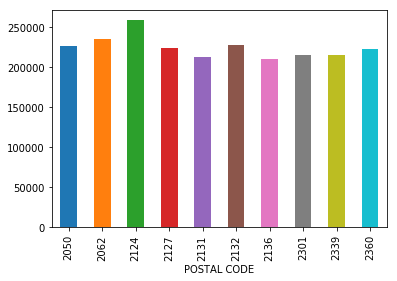

In [230]:
# TOTAL EARNINGS of employees in different postal code areas
top_earning_employees.groupby("POSTAL CODE")["TOTAL EARNINGS ($)"].mean().plot(kind="bar")

# position of Employee with higher base pay
- Bar plot between mean of BASE PAY vs EMPLOYEE POSITION TITLE using .plot () function
- Police Sergeant receives higher base pay
- Overlapping of X-axis is removed using plt.setp() function by specifying the rotation and labels.

[None, None, None, None, None, None, None, None]

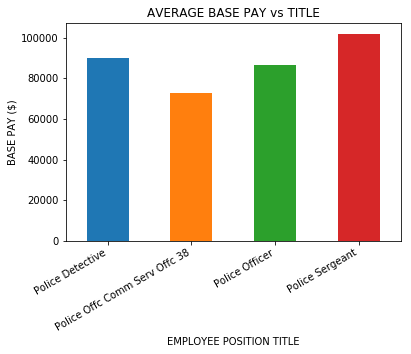

In [231]:
# Position of the employee who receives high BASE PAY 
ax=top_earning_employees.groupby('EMPLOYEE POSITION TITLE')['BASE PAY ($)'].mean().plot(kind='bar')
plt.ylabel('BASE PAY ($)')
plt.title("AVERAGE BASE PAY vs TITLE")
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')


# Box plot for Total earnings based on department
- In the data set "top_earning_employees", there is only one department called Boston Police Department where all employees in this department receives all types of payments.

Findings
- There is an outlier. From which we can infer that one employee among top 10 employees whose earnings are high was paid more than others. This could be because of higher qualification, experience and position of the employee is high.
- Most of the employees receive total pay of 225000 on average.

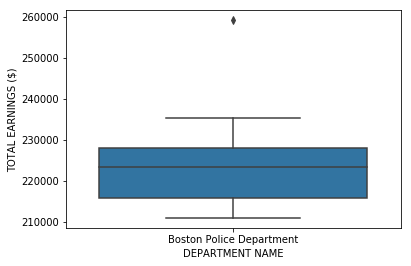

In [232]:
sns.boxplot(x="DEPARTMENT NAME", y="TOTAL EARNINGS ($)", data=top_earning_employees)

# Identifying which type of pay contributed more to total earnings in different postal areas
- The stacked bar plot for all pay columns for different postal codes were plotted using plt.bar () function mentioning the bottom values.

Findings
- For all postal codes, BASE PAY contributed more followed by 'OVERTIME' AND 'DETAIL PAY'
- RETRO PAY AND OTHER PAY contributed very less for the total earnings for diffrent postal code areas.
- QUINN/EDUCATION INCENTIVE pay contributes equal amount for total earnings in all postal code areas.

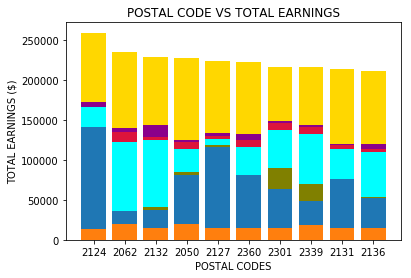

In [233]:
a=top_earning_employees['BASE PAY ($)']
b=top_earning_employees['DETAIL PAY ($)']
c=top_earning_employees['OTHER PAY ($)']
i=top_earning_employees['OVERTIME PAY ($)']
d=top_earning_employees['RETRO PAY ($)']
f=top_earning_employees['INJURED PAY ($)']
g=top_earning_employees['QUINN/EDUCATION INCENTIVE ($)']
h=top_earning_employees['POSTAL CODE']
plt.bar(h,a,bottom=b+c+d+f+g+i,color='gold') #  BASE PAY
plt.bar(h,d,bottom=b+c+f+g+i,color='darkmagenta')   # RETRO PAY
plt.bar(h,c,bottom=b+f+g+i,color='crimson')  # OTHER PAY
plt.bar(h,i,bottom=b+f+g,color='aqua')     # OVERTIME PAY
plt.bar(h,f,bottom=b+g,color='olive') # INJURED PAY 
plt.bar(h,b,bottom=g)   #DETAIL PAY
plt.bar(h,g)   #QUINN/EDUCATION INCENTIVE
plt.title('POSTAL CODE VS TOTAL EARNINGS')
plt.xlabel("POSTAL CODES")
plt.ylabel("TOTAL EARNINGS ($)")
plt.show()

# Histograms for all pay columns 
- X-axis gives the data related to the amount of pay in dollars and Y-axis represents the frequency of repetition of the pay amount in each histogram
-  In each histogram, there is no proper shape. The data is not distributed Normally. 
- For example,from BASE PAY histogram (first histogram) we can say that most of the data is present at one side. That means Most of the Employees receive salary in the range between 85000 to 95000.
- From the distribution plot using distplot() also we can identify the mean is is there on the right side where most data is present
- Comparing the Distribution, the distribution of DETAIL PAY is left tailed and the distribution is more compared to BASE PAY

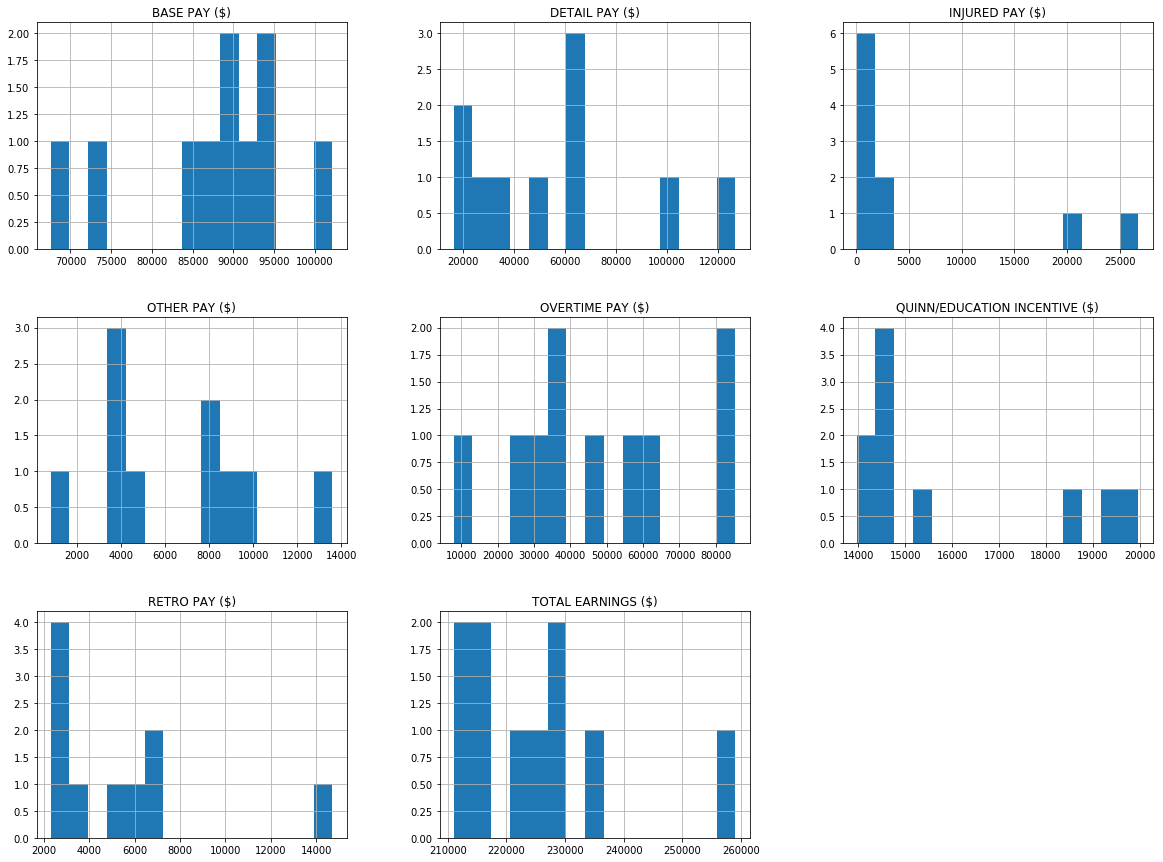

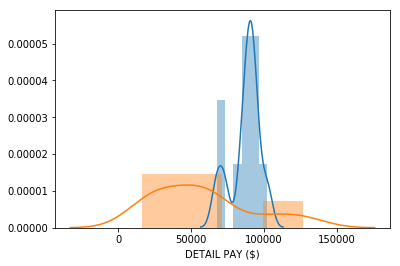

In [235]:
# Histograms for all pay columns
top_earning_employees.hist(bins=15, figsize=(20,15))
plt.ylabel('Frequency')
plt.show()
# distribution plot
sns.distplot(top_earning_employees['BASE PAY ($)'])
sns.distplot(top_earning_employees['DETAIL PAY ($)'])

#  lmplot for Quinn pay and base pay
-  PLot for Quinn pay and Base pay using seaborn lmplot () function for a department BOSTON POLICE
-  We can identify some outliers that means there are some employees who receive more or less pay
- The employees who gets more quinn pay receives less base pay
- The employees who receives less quinn pay receives high base pay

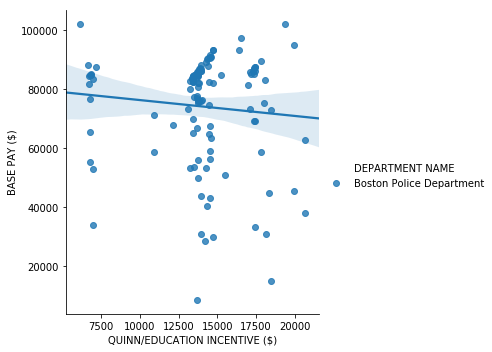

In [203]:
import seaborn as sns
#ax=sns.jointplot(x='TOTAL EARNINGS ($)', y='INJURED PAY ($)', data=df_report_2017_list)
#sns.lmplot(x="TOTA EARNINGS ($)", y="BASE PAY ($)",col="EMPLOYEE POSITION TITLE", hue="EMPLOYEE POSITION TITLE", data=top_earning_employees)
sns.lmplot(x='QUINN/EDUCATION INCENTIVE ($)', y='BASE PAY ($)',hue='DEPARTMENT NAME', data=df_report_2017_list)

#  Employee who receives more Detail pay based on Title of the employee
- lmplot () for all employee positions for DETAIL PAY, to know who gets more detail pay
- There is more steepness for Police Detective line compared to other positions. From this we can say that Police Detective gets more DETAIL PAY compared to other positions of employees

<Figure size 576x288 with 0 Axes>

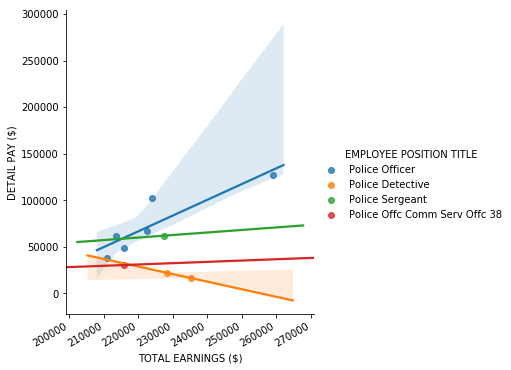

In [204]:
plt.figure(figsize=(8,4))
ax=sns.lmplot(x="TOTAL EARNINGS ($)", y="DETAIL PAY ($)", hue= "EMPLOYEE POSITION TITLE", data=top_earning_employees)
ax.set_xticklabels( rotation=30, ha="right")

# Predictive Anlaytics

# The distribution plot fro BASE PAY, RETRO PAY AND QUINN PAY
- The distribution of Quinn pay is very less compared to Base pay and Retro pay
- The BAse pay is highly distributed and has large mean value compared to quinn and retro pay
- Based on the distribution of these pays, we can identify what type of pay the employees receives more.

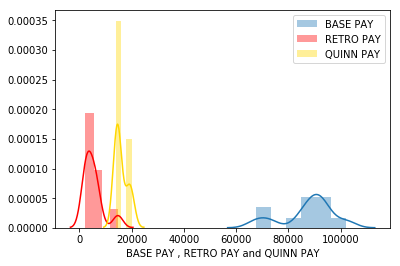

In [238]:
import statsmodels
import statsmodels.stats as stats
a=top_earning_employees['BASE PAY ($)']
b=top_earning_employees['RETRO PAY ($)']
c=top_earning_employees['QUINN/EDUCATION INCENTIVE ($)']
sns.distplot(a)
sns.distplot(b, color='red')
sns.distplot(c, color='gold')
plt.xlabel("BASE PAY , RETRO PAY and QUINN PAY")
plt.legend(['BASE PAY', 'RETRO PAY', 'QUINN PAY'])

# Predicting the base pay based on quinn pay
- The employees who get high QUINN pay are highly educated and they get incremented base pay
- Studying whether the BASE PAY increased with increase of QUINN PAY.
- Using Linear model Regression, predicting the base pay
 
Findings
- With increment in Quinn pay the base pay is not increasing
- The employees who get High QUINN PAY receives less BASE PAY from the plot
- We can see the line which gives the predictive values of base pay based on QUINN pay

y:(123, 1)
X:(123, 2)


C:\Users\saila\Anaconda3\New\envs\py37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\saila\Anaconda3\New\envs\py37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Text(0, 0.5, 'BASE PERCENT')

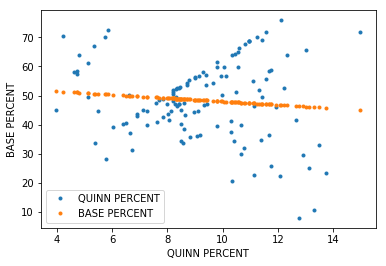

In [206]:
from sklearn import linear_model
from patsy import dmatrices

df_report_2017_list['QUINN PERCENT']=((df_report_2017_list['QUINN/EDUCATION INCENTIVE ($)']/df_report_2017_list['TOTAL EARNINGS ($)'])*100).astype(float)
df_report_2017_list['BASE PERCENT']=((df_report_2017_list['BASE PAY ($)']/df_report_2017_list['TOTAL EARNINGS ($)'])*100).astype(float)

y=df_report_2017_list['BASE PERCENT']
X=df_report_2017_list['QUINN PERCENT']

y,X = dmatrices('y ~ X', data=df_report_2017_list)
print("y:{}".format(y.shape))
print("X:{}".format(X.shape))
model = linear_model.LinearRegression(fit_intercept=False)
res = model.fit(X,y )
plt.plot(X[:,1], y, '.')
plt.plot(X[:,1], model.predict(X), '.')
plt.legend(['QUINN PERCENT', 'BASE PERCENT'])
plt.xlabel("QUINN PERCENT")
plt.ylabel("BASE PERCENT")

# Distribution plot for actual base pay and predicted base pay

C:\Users\saila\Anaconda3\New\envs\py37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


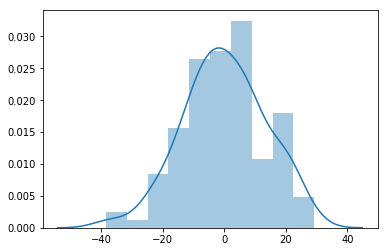

In [207]:
# plot for above prediction
sns.distplot(y - model.predict(X))

# Predicting base pay percent for total earnings 

C:\Users\saila\Anaconda3\New\envs\py37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\saila\Anaconda3\New\envs\py37\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\saila\Anaconda3\New\envs\py37\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\saila\Anaconda3\New\envs\py37\lib\site-packages\numpy\lib\histograms.py:823: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Text(0, 0.5, 'BASE PERCENT')

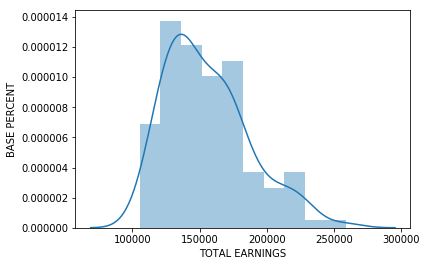

In [208]:
#df_report_2017_list['QUINN PERCENT']=((df_report_2017_list['QUINN/EDUCATION INCENTIVE ($)']/df_report_2017_list['TOTAL EARNINGS ($)'])*100).astype(float)

df_report_2017_list['BASE PERCENT']=((df_report_2017_list['BASE PAY ($)']/df_report_2017_list['TOTAL EARNINGS ($)'])*100).astype(float)
y=df_report_2017_list['BASE PERCENT']
X=df_report_2017_list['TOTAL EARNINGS ($)']
y, X = dmatrices('y ~ X', data=df_report_2017_list)
sns.distplot(X[y[:,0] > 0, 1])
sns.distplot(X[y[:,0] == 0, 1])
plt.xlabel("TOTAL EARNINGS")
plt.ylabel("BASE PERCENT")

# OLS (ordinary Least squares) Regression results
- These give all the statistic values by performing some test
- As the sample size is very less F-Test was done and the all the statistic values of the sample BASE pay and TOTAL EARNINGS 
- From the statistic values, The R-squared value is 0.044 which is the error and gives the difference between the original values and he line.
- Skewness value gives how much distance the data points are present from the mean.
- Kurtosis gives the sahpe of the distribution
- P-value and Test statistic values used to check whether the to reject the null hypothesis or not based on the Significance and critical values for different confidence levels

In [209]:
a=top_earning_employees['BASE PAY ($)']
b=top_earning_employees['TOTAL EARNINGS ($)']
results = smf.ols('a ~ b' , data = top_earning_employees).fit()
print(results.params)
results.summary()

Intercept    52775.470703
b                0.153687
dtype: float64


C:\Users\saila\Anaconda3\New\envs\py37\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      a   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                 -0.075
Method:                 Least Squares   F-statistic:                    0.3708
Date:                Thu, 13 Dec 2018   Prob (F-statistic):              0.559
Time:                        15:29:50   Log-Likelihood:                -105.81
No. Observations:                  10   AIC:                             215.6
Df Residuals:                       8   BIC:                             216.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.278e+04    5.7e+04      0.927      0.381   -7.86e+04    1.84e+05
b              0.1537      0.252      0.609      0.559      -0.428       0.736
==============================================================================
Omnibus:                        0.951   Durbin-Watson:                   1.760
Prob(Omnibus):                  0.621   Jarque-Bera (JB):                0.676
Skew:                          -0.550   Prob(JB):                        0.713
Kurtosis:                       2.358   Cond. No.                     3.82e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Highly educated Employees work for long hours or not
- To know whether the highly educated employees work for long hours or not
- I am using OLS stats model using from_formula function. This accepts a string which describes the model in terms of a patsy formula

Findings:
- Highly educated employees work for long hours and get highly paid
- From the plot we can identify, with increase in quinn pay, the overtime pay also increases. From this we can conclude that employees whose qualification is less works for less overtime hours compared to the employees who have higher qualification 

Intercept    13911.502728
B                0.754302
dtype: float64


Text(0.5, 1.0, 'QUINN VS OVERTIME PAY')

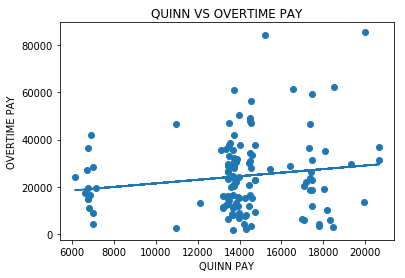

In [213]:
a=df_report_2017_list['OVERTIME PAY ($)']
B=df_report_2017_list['QUINN/EDUCATION INCENTIVE ($)']
model = smf.OLS.from_formula('a ~ B', data =df_report_2017_list )
results = model.fit()
print(results.params)

plt.scatter(B,a)
plt.plot(B, results.fittedvalues)
plt.xlabel('QUINN PAY')
plt.ylabel('OVERTIME PAY')
plt.title('QUINN VS OVERTIME PAY')

# Conclusion
- The data set Employee Earnings report, the employees belong to different departments with different position titles. The employees who receive high base pay doesnt receive high quinn pay. The Base pay and the overtime pay contribute more to total earnings than other pay types. Most of the employees work very hard and they receive high overtime pay than their base pay
- The employees with same title in different postal regions in boston receive different salaries. I think It depends on their experience and the qualification influencing their pay along with how mant hours they are working.
- Using Predictive analytics, from the analysis of Quinn pay and overtime pay, it was concluded that the employees does work hard though they are highly educated.